# Ecualización del histograma de una imagen con CPU
- La ecualización del histograma de una imagen es una transformación que pretende obtener para una imagen un histograma con una distribución uniforme. Es decir, que exista el mismo número de píxeles para cada nivel de gris del histograma de una imagen monocroma.

In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from numba import cuda
import time

In [2]:
# Verificar si se está utilizando CPU
if cuda.is_available():
    print("No se está utilizando la CPU. Por favor, asegúrate de habilitar el entorno de ejecución de CPU en Google Colab.")
else:
    print("Se está utilizando la CPU.")

Se está utilizando la CPU.


Tiempo de procesamiento: 48.955673 segundos


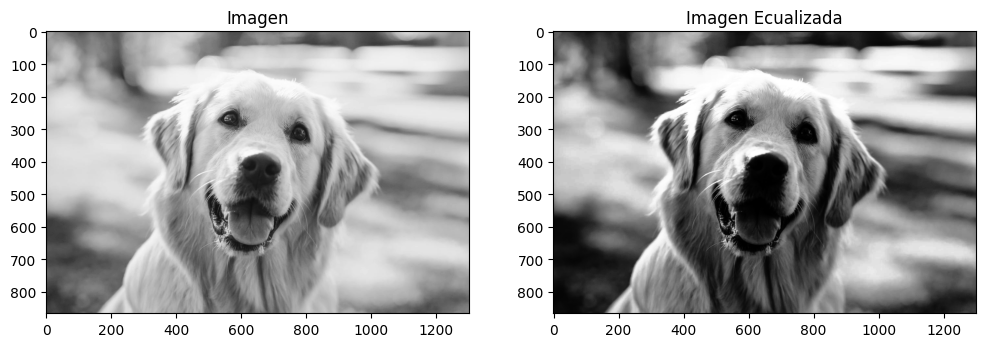

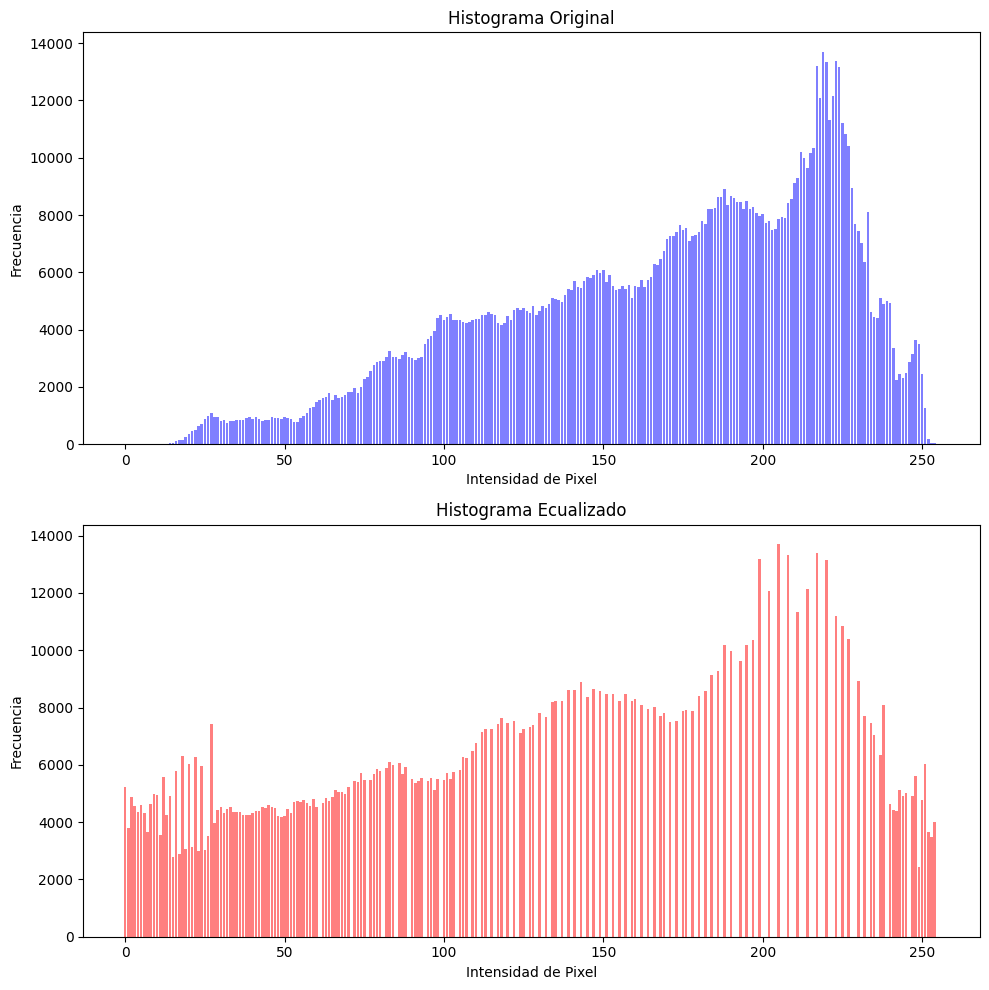

In [3]:
start_time = time.time()

# leer la imagen y colocarla en escala de gris
img = cv2.imread("/content/images/image.jpg", cv2.IMREAD_GRAYSCALE)
# img = cv2.imread("./image2.jpg", cv2.IMREAD_GRAYSCALE)

# obtener las características de la imagen para procesar el histograma
width, height = img.shape

# colocar en el eje x de 0 a 255 valores
x = np.linspace(0, 255, num=256, dtype=np.uint8)
y = np.zeros(256) # será del mismo tamaño que nuestro espacio lineal, es decir, igual a la cantidad de valores de x pero con puros ceros, es decir, tendrá 256 posiciones
y1 = np.zeros(256) # para el histograma ecualizado. Será del mismo tamaño que nuestro espacio lineal, es decir, igual a la cantidad de valores de x pero con puros ceros, es decir, tendrá 256 posiciones
imagenEcualizada= np.zeros(img.shape, img.dtype) # imagen del mismo tamaño y características que la anterior la cual ya sería la imagen ecualizada

# Obtener el histograma
# cálculo del histograma (contabilizar cuántos pixeles existen para cada nivel de gris)
for w in range (width): # recorrer todo el ancho de la imagen
  for h in range (height): # recorrer todo el alto de la imagen
    v = img[w,h] # tomar el valor del pixel en la posición [w,h]
    y[v] = y[v]+1; # del valor anterior tomarlo como posición en el arreglo y para ir contabilizando el valor que tenía (inició con puros ceros) + 1, lo cual estaríamos acumulando o incrementando cada vez que aparece un pixel igual

# tener el total, es decir, el producto de n*n. El 255 sería (L - 1), es decir, (256 - 1)
k = 255 / (width * height)

# variable para acumular las sumatorias
suma = 0

# recorrer el histograma para ir haciendo la sumatoria nivel por nivel y hacer la normalización con nuestra constante k como nos dice la función de ecualización
for w in range (width): # recorrer todo el ancho de la imagen
  for h in range (height): # recorrer todo el alto de la imagen
    for s in range (img[w,h]): # recorrer pixel por pixel para calcular la sumatoria, recorrer desde 0 hasta el valor del pixel en cuestión, es decir [w,h]
      suma = suma + y[s] # calcular la suma de los valores acumulados en mi histograma
      # asignar el nuevo valor de intensidad del pixel usando la constante k para normalizar el valor
    imagenEcualizada[w,h] = k*suma # calcular el valor del pixel en la imagen mejorada en esa posición [w,h] y que será el producto de k por el valor de la suma
    suma = 0 # reinicializar el valor de la suma a 0 para poder calcular el valor del siguiente pixel

# Obtener el histograma ecualizado
# cálculo del histograma (contabilizar cuántos pixeles existen para cada nivel de gris)
for w in range (width): # recorrer todo el ancho de la imagen ecualizada
  for h in range (height): # recorrer todo el alto de la imagen ecualizada
    v = imagenEcualizada[w,h] # tomar el valor del pixel en la posición [w,h]
    y1[v] = y1[v]+1; # del valor anterior tomarlo como posición en el arreglo y para ir contabilizando el valor que tenía (inició con puros ceros) + 1, lo cual estaríamos acumulando o incrementando cada vez que aparece un pixel igual

end_time = time.time()
execution_time = end_time - start_time
print("Tiempo de procesamiento: {:.6f} segundos".format(execution_time))

# ******************************************************************************************************************************
# mostrar la imagen y la imagen ecualizada en una ventana aparte
# cv2.imshow("imagen", cv2.hconcat([img, imagenEcualizada]))
# plt.bar(x,y)
# plt.show()
# cv2.waitKey(0)
# cv2.destroyAllWindows
# ******************************************************************************************************************************

# mostrar la imagen y el imagen mejorada distribuidas horizontalmente
plt.figure(figsize=(12, 6))

# mostrar la imagen
plt.subplot(1, 2, 1)
plt.imshow(img, cmap='gray')
plt.title('Imagen')

# mostrar la imagen mejorada
plt.subplot(1, 2, 2)
plt.imshow(imagenEcualizada, cmap='gray')
plt.title('Imagen Ecualizada')

# mostrar el histograma de la imagen y el histograma de la imagen ecualizada distribuidas verticalmente
plt.figure(figsize=(10, 10))

plt.subplot(2, 1, 1)
plt.bar(x, y, color='blue', alpha=0.5)
plt.title('Histograma Original')
plt.xlabel('Intensidad de Pixel')
plt.ylabel('Frecuencia')

plt.subplot(2, 1, 2)
plt.bar(x, y1, color='red', alpha=0.5)
plt.title('Histograma Ecualizado')
plt.xlabel('Intensidad de Pixel')
plt.ylabel('Frecuencia')

plt.tight_layout()
plt.show()
